In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5) 
import csv 
from operator import itemgetter

In [2]:
df = pd.read_csv("C:\Users\Vineeth\OneDrive\Documents\CSE 160\crime_dataset.csv", low_memory = False)

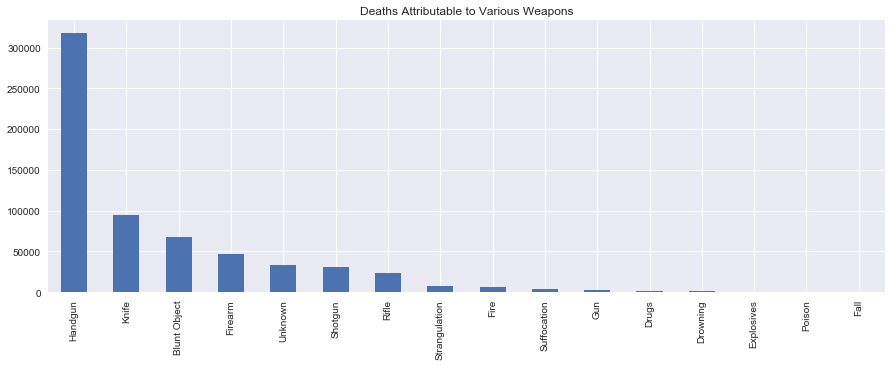

In [3]:
df["Weapon"].value_counts().plot(kind = "bar")
plt.title('Deaths Attributable to Various Weapons')

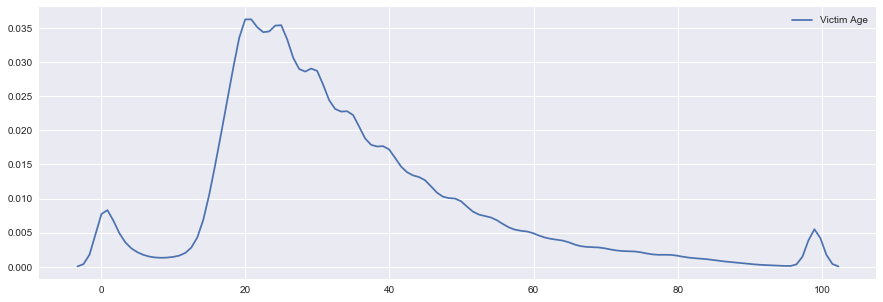

In [4]:
hdata = df[df['Victim Age']!=998]
sns.kdeplot(hdata['Victim Age'])

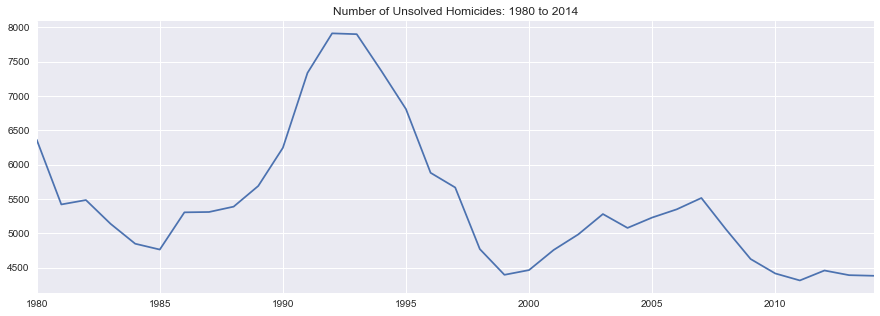

In [5]:
unsolved = df[df["Crime Solved"] != "Yes"]
unsolved['Year'].value_counts().sort_index(ascending=True).plot(kind='line')
plt.title('Number of Unsolved Homicides: 1980 to 2014')

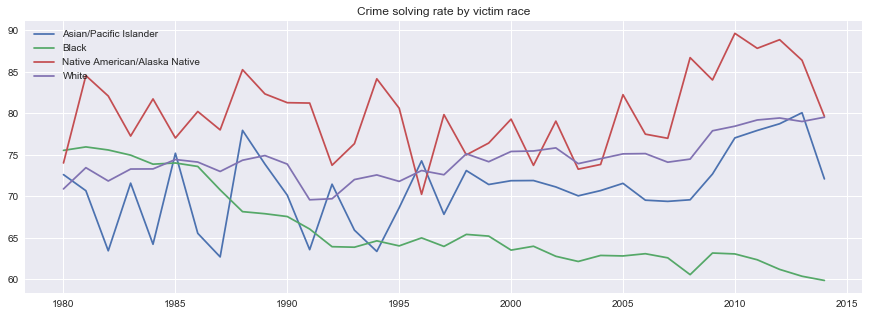

In [6]:
d4= df[['Victim Race','Year','Crime Solved']]
d4=d4.groupby(by=['Victim Race', 'Year','Crime Solved']).agg({'Crime Solved':'count'})
d4= d4.groupby(level=[0,1]).apply(lambda x:100 * x/x.sum())
fig = plt.figure()
ax = fig.add_subplot(111)
d4.columns=["Solved_count"]

for name, group in d4.groupby(level=0):
    if name!="Unknown":
        group= group.reset_index().drop("Victim Race",1)
        group=group[group["Crime Solved"]=="Yes"]
        ax.plot(group["Year"], group["Solved_count"], label=name)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.title('Crime solving rate by victim race')
plt.show()

In [10]:
def extract_data(filename, column_names, exclude_points):    
    output_dict = dict()
    csv_file = open(filename)
    
    # Reading each row of the csv file, excluding points that are invalid or "placeholder" points
    for row in csv.DictReader(csv_file):
        for name in column_names:
            if row[name] not in exclude_points:
                if name in output_dict.keys():
                    output_dict[name].append(row[name])
                else:
                    output_dict[name] = [row[name]]   
   
    csv_file.close()  
    return output_dict

def find_mode_of_category(data_dict, column_name):
    data = data_dict[column_name]
    
    # Finding counts of each data point in column
    number_dict = dict()
    for datum in data: 
        if datum in number_dict.keys():
            number_dict[datum] += 1
        else: 
            number_dict[datum] = 1
            
    # Converting counts into percentage of total data points
    num_of_points = sum(number_dict.values())
    for val in number_dict.keys():
        number_dict[val] = float(number_dict[val]) / num_of_points
        
    # Sorting data from max frequency to min frequency, first datum is max
    max_to_min = sorted(number_dict.items(), key = itemgetter(1), reverse = True)
    max_freq_datum = max_to_min[0]
    
    return max_freq_datum

def find_max_of_all(data_dict, column_names):
    output = list()
    for name in column_names:
        max_of_category = find_mode_of_category(data_dict, name)
        output.append(max_of_category)
        
    for val in range(len(column_names)):
        print "Most frequent %s: %s, %s" %(column_names[val], output[val][0] , format(float(output[val][1]) * 100 , '.2f')) + "%"







def main():
    
    filename = "C:\Users\Vineeth\OneDrive\Documents\CSE 160\crime_dataset.csv"
    column_names = ["Victim Sex", "Victim Age", "Victim Race", "Relationship"]
    exclude_points = ['Unknown', '0', '998']
    
    states_dict = { 
    'west' : ['Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'], 
    'midwest' : ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Missouri', 'Minnesota', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
    'northeast' : ['Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
    'southwest' : ['Arizona', 'New Mexico', 'Oklahoma', 'Texas'],
    'southeast' : ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia'],
    }

    data_dict = extract_data(filename, column_names, exclude_points)
    find_max_of_all(data_dict, column_names)

if __name__ == "__main__":
    main()

Most frequent Victim Sex: Male, 77.51%
Most frequent Victim Age: 22, 3.66%
Most frequent Victim Race: White, 50.24%
Most frequent Relationship: Acquaintance, 34.48%
